<a href="https://colab.research.google.com/github/1kaiser/-DEM-30m-90m-srtm/blob/main/dem_%F0%9F%97%BA%EF%B8%8F_3d_elevation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **🦉** introduced from >>>  [Earth Data Analytics](https://www.earthdatascience.org/tutorials/get-slope-aspect-from-digital-elevation-model/) && [elevation 1.1.3: Python script to download global terrain digital elevation models, SRTM 30m DEM and SRTM 90m DEM. ](https://pypi.org/project/elevation/)

In [5]:
pip install GDAL Matplotlib numpy elevation richdem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from osgeo import gdal
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import elevation 
import os
import richdem as rd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
make: Entering directory '/root/.cache/elevation/SRTM3'
make: Nothing to be done for 'download'.
make: Leaving directory '/root/.cache/elevation/SRTM3'
make: Entering directory '/root/.cache/elevation/SRTM3'
make: Nothing to be done for 'all'.
make: Leaving directory '/root/.cache/elevation/SRTM3'
make: Entering directory '/root/.cache/elevation/SRTM3'
cp SRTM3.vrt SRTM3.3649bed5221740dca79bcb61edca05d8.vrt
make: Leaving directory '/root/.cache/elevation/SRTM3'
make: Entering directory '/root/.cache/elevation/SRTM3'
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 -projwin 1.32 7.02 2.02 6.04 SRTM3.3649bed5221740dca79bcb61edca05d8.vrt /content/90m-DEM.tif
rm -f SRTM3.3649bed5221740dca79bcb61edca05d8.vrt
make: Leaving directory '/root/.cache/elevation/SRTM3'
make: Entering directory '/root/.cache/elevation/SRTM1'
make: Nothing to be done for 'download'.
mak

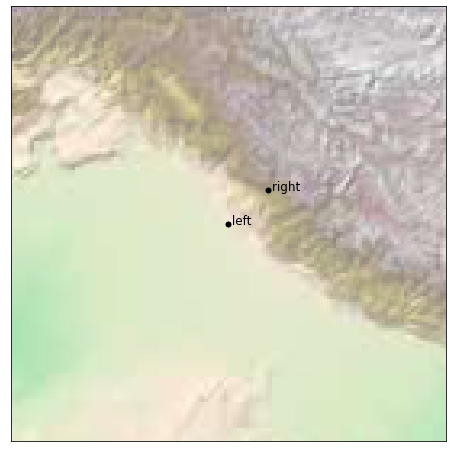

In [2]:
#@title Enter Left Bottom (lat,long) Right Top (lat,long) { vertical-output: true }
left_bottom_latitude = 31.32 #@param {type:"raw"}
left_bottom_longutude = 76.04 #@param {type:"raw"}
Right_Top_lattitude = 32.02 #@param {type:"raw"}
Right_Top_Longitude = 77.02 #@param {type:"raw"}
################################################################################
#draw map
%matplotlib inline
!python -m pip install basemap
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=1E6, height=1E6, 
            lat_0=left_bottom_latitude, lon_0=left_bottom_longutude,)
m.etopo(scale=1, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x1, y1 = m(left_bottom_longutude,left_bottom_latitude)
plt.plot(x1, y1, 'ok', markersize=5)
plt.text(x1, y1, ' left', fontsize=12);

x2, y2 = m(Right_Top_Longitude,Right_Top_lattitude)
plt.plot(x2, y2, 'ok', markersize=5)
plt.text(x2, y2, ' right', fontsize=12);
################################################################################

#90 m SRTM
!eio --product SRTM3 clip -o 90m-DEM.tif --bounds ${left_bottom_latitude} ${left_bottom_longutude} ${Right_Top_lattitude}  ${Right_Top_Longitude}
#30 m SRTM
!eio clip -o 30m-DEM.tif --bounds ${left_bottom_latitude} ${left_bottom_longutude} ${Right_Top_lattitude} ${Right_Top_Longitude}
!eio clean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


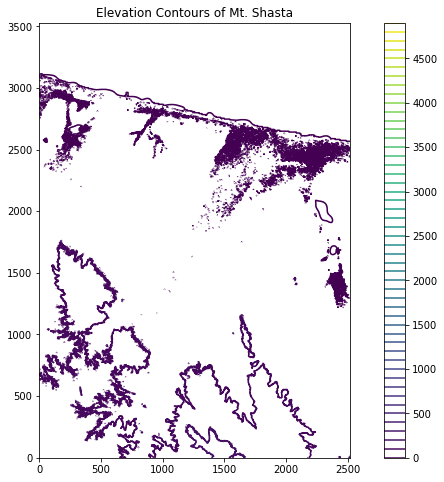

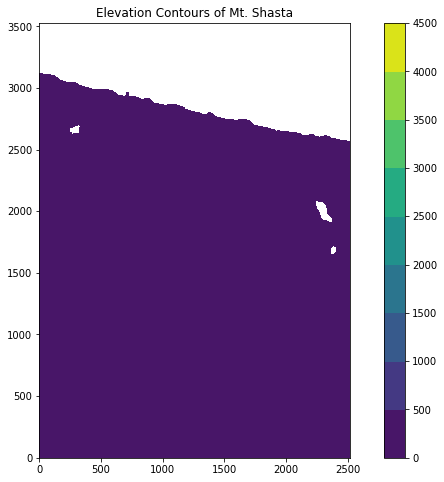

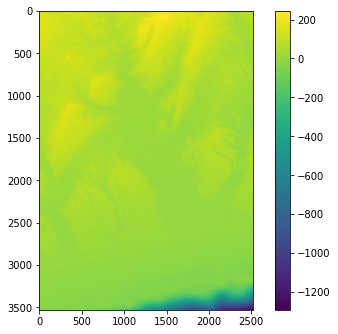

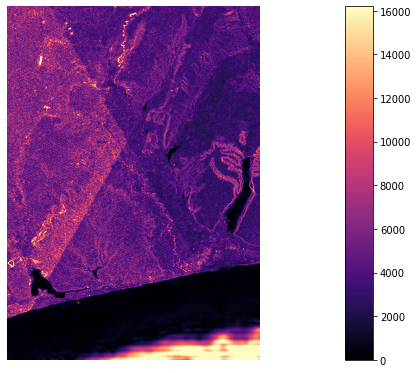

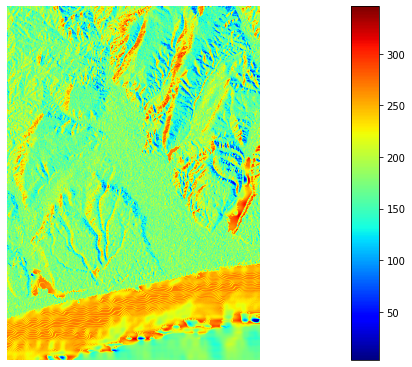

In [6]:
#@title Default title text { vertical-output: true }
filename = "30m-DEM.tif" #@param ["30m-DEM.tif", "90m-DEM.tif"] {allow-input: true}
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array = gdal_data.ReadAsArray().astype(np.float)
data_array

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan


#Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contour(data_array, cmap = "viridis", 
            levels = list(range(0, 5000, 100)))
plt.title("Elevation Contours of Mt. Shasta")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


#Plot our data with Matplotlib's 'contourf'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contourf(data_array, cmap = "viridis", 
            levels = list(range(0, 5000, 500)))
plt.title("Elevation Contours of Mt. Shasta")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

matplotlib.rcParams['figure.figsize'] = (8, 5.5)

dem_path = os.path.join(os.getcwd(), filename)

shasta_dem = rd.LoadGDAL(dem_path)
plt.imshow(shasta_dem, interpolation='none')
plt.colorbar()
plt.show()


slope = rd.TerrainAttribute(shasta_dem, attrib='slope_riserun')
rd.rdShow(slope, axes=False, cmap='magma', figsize=(8, 5.5))
plt.show()

aspect = rd.TerrainAttribute(shasta_dem, attrib='aspect')
rd.rdShow(aspect, axes=False, cmap='jet', figsize=(8, 5.5))
plt.show()